In [1]:
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [2]:
def get_children(G, node):
    return [i[1] for i in list(G.out_edges(node))]

def get_parents(G, node):
    return [i[0] for i in list(G.in_edges(node))]

In [3]:
def get_weight(G, node):
    return G.nodes[node]['weight']

In [4]:
def get_num(G, node):
    return G.nodes[node]['number']

In [5]:
def is_smaller(arr1, arr2):
    arr1.sort(reverse=True)
    arr2.sort(reverse=True)
    for i, j in zip(arr1, arr2):
        if i < j:
            return True
        elif i > j:
            return False
    if len(arr1) <= len(arr2):
        return True
    else:
        return False

In [6]:
def set_weight(G):
    n = len(G)
    for node in G.nodes():
        if len(get_parents(G, node)) == 0:
            G.nodes[node].update({'weight' : []})
        else:
            G.nodes[node].update({'weight' : [n+1]})
        G.nodes[node].update({'number' : n+1})
    
    min_node = list(G.nodes())[0]
    nodes_with_num = []
    count = 1
    for i in range(1, n+1):
        min_weight = [n+1]
        for node in G.nodes():
            if node not in nodes_with_num:
                if is_smaller(get_weight(G, node), min_weight):
                    min_weight = get_weight(G, node).copy()
                    min_node = node
        G.nodes[min_node].update({'number' : count})
        children = get_children(G, min_node)
        for cnode in children:
            par = []
            for p in get_parents(G, cnode):
                par.append(get_num(G, p))
            par.sort(reverse=True)
            G.nodes[cnode].update({'weight' : par})
        nodes_with_num.append(min_node)
        count += 1

In [7]:
def set_layers(G, w=3):
    n = len(G)
    nodes_situated = []
    tnode = list(G.nodes())[0]
    while len(nodes_situated) < n:
        max_num = 0
        for node in G.nodes():
            if node not in nodes_situated:
                if (get_num(G, node) > max_num):
                    children = get_children(G, node)
                    flag = 1
                    for c in children:
                        if c not in nodes_situated:
                            flag = 0
                    if flag:
                        max_num = get_num(G, node)
                        tnode = node
        children = get_children(G, tnode)
        max_layer = 1
        for c in children:
            if coords[c][1] >= max_layer:
                max_layer = coords[c][1] + 1
        while True:
            if len(cont_layer[max_layer]) == w:
                max_layer += 1
            else:
                break
        cont_layer[max_layer].append(tnode)
        coords[tnode] = [len(cont_layer[max_layer]), max_layer]
        nodes_situated.append(tnode)


In [8]:
G = nx.read_graphml('flow-15n.xml')

In [9]:
set_weight(G)

### Здесь задавать ширину слоя

In [10]:
w=3

In [11]:
coords = {}
for node in G.nodes():
    coords[node] = [0, 0]
cont_layer = defaultdict(list)
set_layers(G, w)
for node in G.nodes():
    np.random.seed(coords[node][1])
    coords[node][0] += np.random.random()

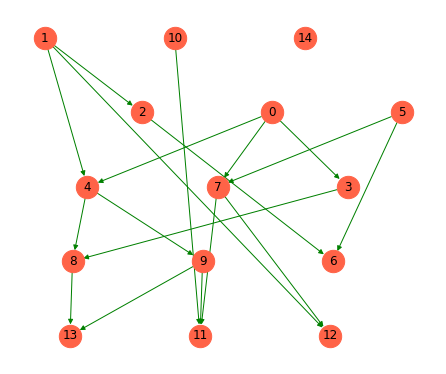

In [12]:
plt.figure(figsize=(w*2, len(G)//w))
nx.draw(G, pos=coords, with_labels=True, node_color='tomato', edge_color='green', node_size=500)